Philippe Joly 2025-09-01

# RePFB Test

Compares the streaming PFB algorithm with the more conventional approach.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fn = "/scratch/philj0ly/test_08_25/test_sine_1792_1024.npz"
fn="/scratch/philj0ly/test_09_11/test_sine__3_6144_1024.npz"

with np.load(fn) as f:
    stream = np.ma.MaskedArray(data=f["data"], mask=f['mask'])
    og = np.ma.MaskedArray(data=f["true_data"], mask=f['true_mask'])

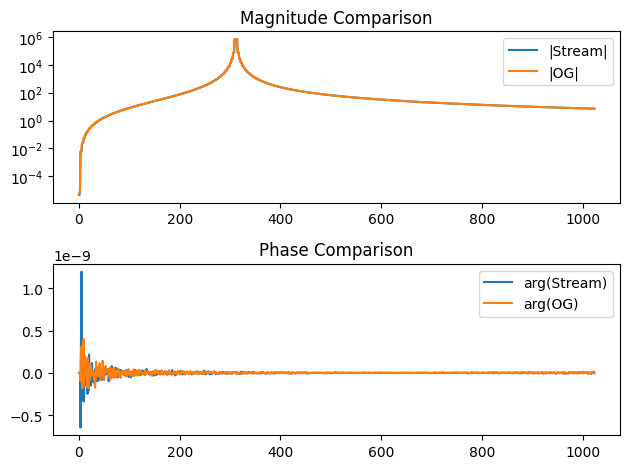

In [3]:
mag_x = np.abs(stream[0,0,:,0])
mag_y = np.abs(og[0,0,:,0])

phase_x = np.angle(stream[0,0,:,0])
phase_y = np.angle(og[0,0,:,0])

plt.figure()
plt.subplot(2,1,1)
plt.plot(mag_x, label="|Stream|")
plt.plot(mag_y, label="|OG|")
plt.yscale('log')
plt.legend()
plt.title("Magnitude Comparison")

plt.subplot(2,1,2)
plt.plot(phase_x, label="arg(Stream)")
plt.plot(phase_y, label="arg(OG)")
# plt.yscale('log')
plt.legend()
plt.title("Phase Comparison")

plt.tight_layout()
plt.show()


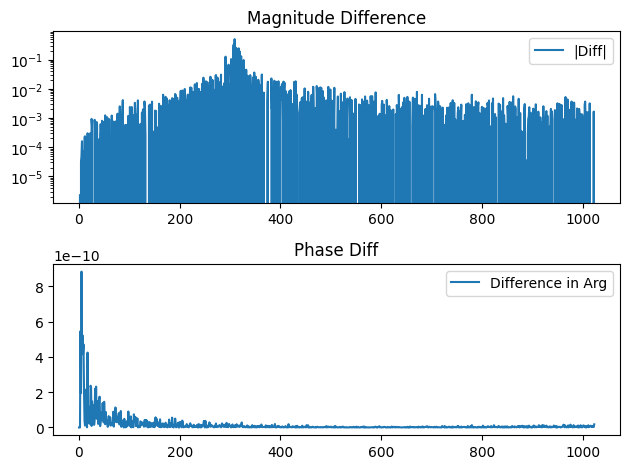

In [4]:
mag_diff = (np.abs(stream)-np.abs(og))[0,0,:,0]
phase_diff = np.abs(phase_x-phase_y)

plt.figure()
plt.subplot(2,1,1)
plt.plot(mag_diff, label="|Diff|")
plt.yscale('log')
plt.legend()
plt.title("Magnitude Difference")

plt.subplot(2,1,2)
plt.plot(phase_diff, label="Difference in Arg")
# plt.yscale('log')
plt.legend()
plt.title("Phase Diff")

plt.tight_layout()
plt.show()

In [5]:
np.allclose(np.abs(stream),np.abs(og), rtol=1e-4,atol=1e-3)

False

In [68]:
atol = np.abs(stream)-np.abs(og)
rtol = atol/np.abs(og)

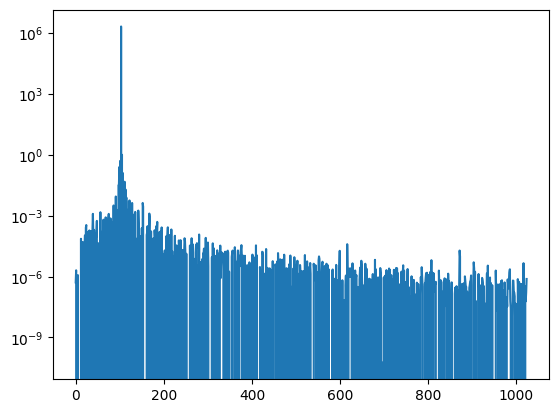

In [70]:
plt.plot(atol[0,0,:,0])
plt.yscale('log')
# plt.xlim(100,120)
plt.show()